Data from 9/20/2022

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [42]:
# Create a custom function for data transformation
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]

def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output  

In [43]:
# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


C:\Users\twolf\AppData\Local\Temp\ipykernel_15604\950947015.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_15604\950947015.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [44]:
df = pd.concat([first_file,second_file]).reset_index()
len(df)
len(first_file)


373

In [45]:
#Add columns for surface and hover taxi maneuvers and default set value to zero
df['Surface_Taxi'] = 0
df['Hover_Taxi'] = 0
#df[['Surface_Taxi','Hover_Taxi']]

df.loc[(df['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 20
df.loc[(df['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['Hover_Taxi']] = 40

[Text(0.5, 0, 'time'), Text(0.5, 1.0, 'Flight Logs from 9/20/22')]

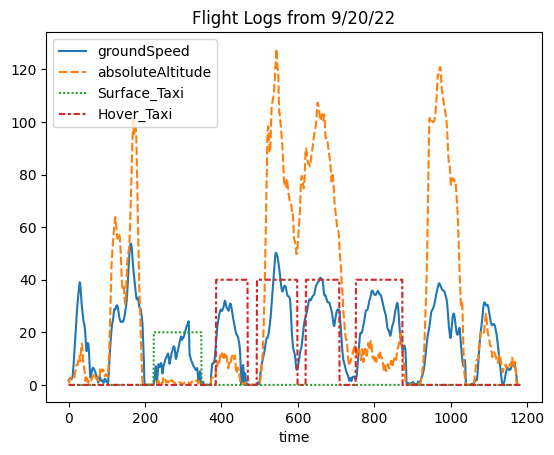

In [46]:
#Plot surface taxi vs altitude over time
df_surface_alt = df[['datetime', 'groundSpeed', 'absoluteAltitude', 'Surface_Taxi', 'Hover_Taxi']]
#sns.lineplot(x='datetime', y='absoluteAltitude',data = df)
p = sns.lineplot(data = df_surface_alt)
p.set(xlabel = 'time', title ='Flight Logs from 9/20/22')





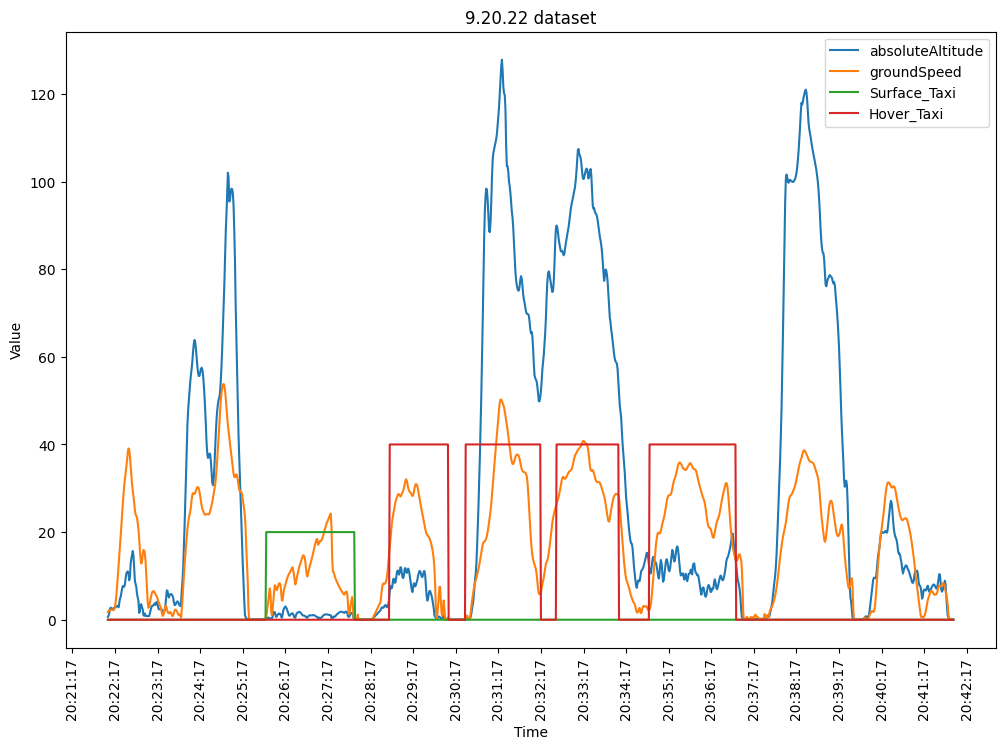

In [25]:
import matplotlib.dates as mdates



plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = df_surface_alt,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = df_surface_alt,
         label = "groundSpeed")
plt.plot('datetime','Surface_Taxi',
         data = df_surface_alt,
         label = "Surface_Taxi")
plt.plot('datetime','Hover_Taxi',
         data = df_surface_alt,
         label = "Hover_Taxi")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('9.20.22 dataset')
plt.legend()
plt.show()

In [47]:
#try rolling windows

df['groundSpeed','absoluteAltitude'] = df['groundSpeed','absoluteAltitude'].rollingling(20).mean()



import matplotlib.dates as mdates



plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = df_surface_alt,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = df_surface_alt,
         label = "groundSpeed")
plt.plot('datetime','Surface_Taxi',
         data = df_surface_alt,
         label = "Surface_Taxi")
plt.plot('datetime','Hover_Taxi',
         data = df_surface_alt,
         label = "Hover_Taxi")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('9.20.22 dataset')
plt.legend()
plt.show()

KeyError: ('groundSpeed', 'absoluteAltitude')

In [33]:
#Normalize data
#normalize values for entire dataframe
df_norm = df.loc[:, df.columns != 'datetime']
df_norm = (df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm.insert(1, 'datetime', df[['datetime']])

In [36]:

#Add columns for surface and hover taxi maneuvers and default set value to zero
df_norm['Surface_Taxi'] = 0
df_norm['Hover_Taxi'] = 0
#df[['Surface_Taxi','Hover_Taxi']]

df_norm.loc[(df_norm['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['Hover_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['Hover_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['Hover_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['Hover_Taxi']] = 1

[Text(0.5, 0, 'time'), Text(0.5, 1.0, 'Flight Logs from 9/20/22')]

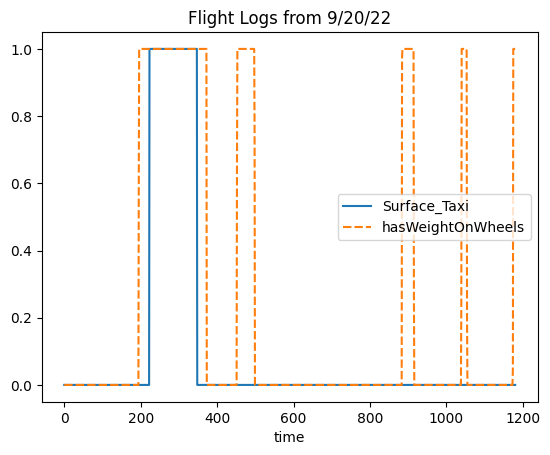

In [38]:
#Weight on wheels and surface taxi
#df_wwheel = df[['datetime', 'groundSpeed', 'absoluteAltitude', 'Surface_Taxi', 'Hover_Taxi','hasWeightOnWheels']]
df_wwheel = df_norm[['datetime', 'Surface_Taxi','hasWeightOnWheels']]
p = sns.lineplot(data = df_wwheel)
p.set(xlabel = 'time', title ='Flight Logs from 9/20/22')

ValueError: 'climbOrDescentRate' is neither a data key nor a valid format string (unrecognized character 'l')

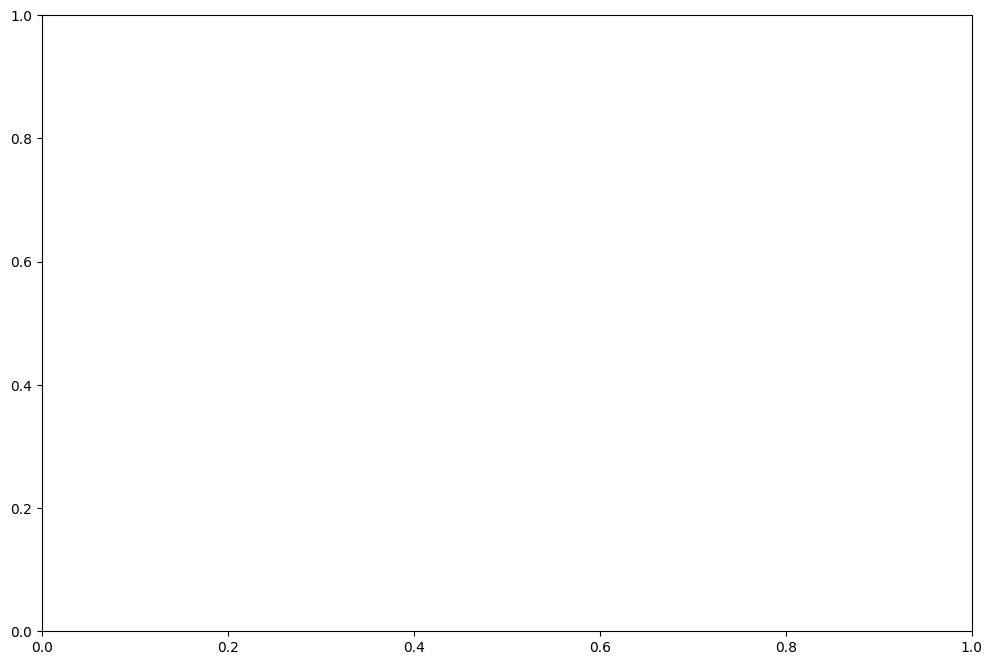

In [40]:
import matplotlib.dates as mdates



plt.figure(figsize=(12, 8))
plt.plot('datetime','climbOrDescentRate',
         data = df_surface_alt,
         label = "climbOrDescentRate")
plt.plot('datetime','Surface_Taxi',
         data = df_surface_alt,
         label = "Surface_Taxi")
plt.plot('datetime','Hover_Taxi',
         data = df_surface_alt,
         label = "Hover_Taxi")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('9.20.22 dataset')
plt.legend()
plt.show()